In [1]:
# Demo of simple optimization in pytorch
# copied from pytorch tutorials and very slightly edited

import torch
import math
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

In [3]:
# Create Tensors to hold input and outputs.
mysize=50
x = torch.linspace(-math.pi, math.pi, mysize)
y = torch.sin(x)+ torch.squeeze(torch.normal(0.0, 0.03, size=(1,mysize)))

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the nn.Linear
# module which is members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)


In [4]:
for t in range(15000): # 150K works even with 25 samples
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 1000 == 999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

999 0.28921759128570557
1999 0.2883912920951843
2999 0.2883913815021515
3999 0.2883913815021515
4999 0.2883914113044739
5999 0.2883913815021515
6999 0.2883913815021515
7999 0.2883914113044739
8999 0.2883913815021515
9999 0.2883913815021515
10999 0.2883914113044739
11999 0.2883913815021515
12999 0.2883913815021515
13999 0.2883914113044739
14999 0.2883913815021515


In [5]:
# The learned parameters
print("a=",model.a.item())
print("b=",model.b.item())
print("c=",model.c.item())
print("d=",model.d.item())

a= 0.013058364391326904
b= 0.849256157875061
c= -0.0018480044091120362
d= -0.09158920496702194


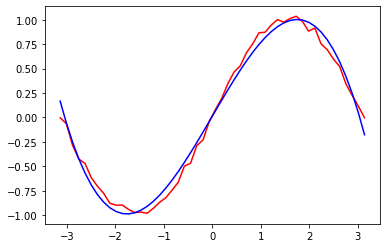

In [6]:
# Plot original and learned function\n",
y_pred = model(x)
plt.clf()
plt.plot(x,y,'r')
plt.plot(x,y_pred.detach().numpy(),'b')
plt.show()